 <center> <span center style="color:red"> <b> Sparks Fondation @GRIP July2022 </span> </center>
  <center> Name: <span style='background :yellow'> <b> Rania Fradi </span> </center>   <br>
        

 <center>  <b>Task3: Perform an Exploratory Data Analysis on a business database to extract the weak areas where we can work on to increase the profit<center> <br>  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

<i> Reading the csv file  

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/git-dibwar/DataScienceAndBusinessAnalytics/main/data/SampleSuperstore.csv')
df.head(9)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825


In [3]:
rows, cols = df.shape
print("Number of Rows = ", rows)
print("Number of Columns = ", cols)

df.describe()

Number of Rows =  9994
Number of Columns =  13


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

<i>Checking the duplication in data</i>

In [6]:
df.duplicated().sum()

17

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

<i>The columns contry and postal code are unuseful</i>

In [9]:
df.drop(["Country", "Postal Code"], axis=1, inplace=True)
df.head(9)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,Los Angeles,California,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Binders,18.5040,3,0.20,5.7825


In [10]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


In [11]:
print('Total sales:', df["Sales"].sum())
print('Total profit:', df["Profit"].sum())

Total sales: 2296195.5903
Total profit: 286241.4226


# Exploratory Data Analysis

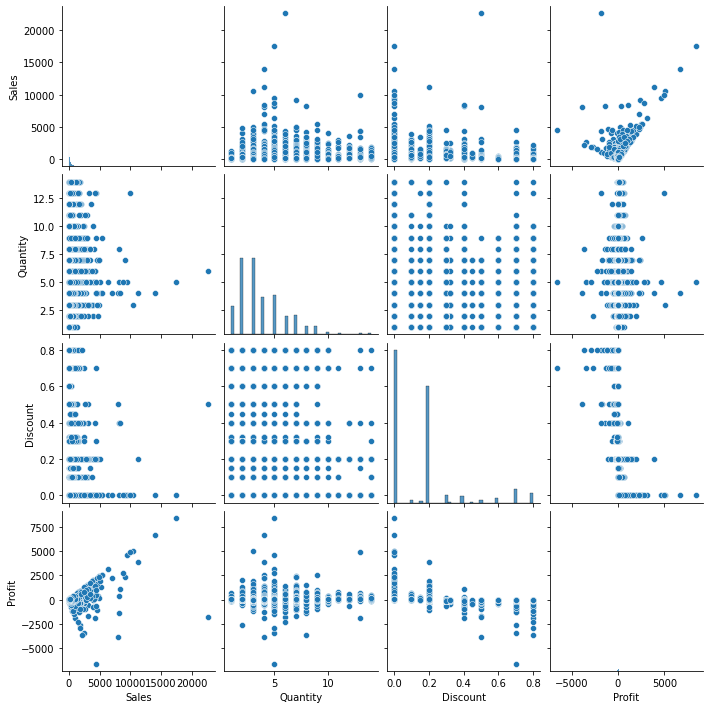

In [12]:
sns.pairplot(df)

<i>Heat map over correlation funciton between variables:</i>

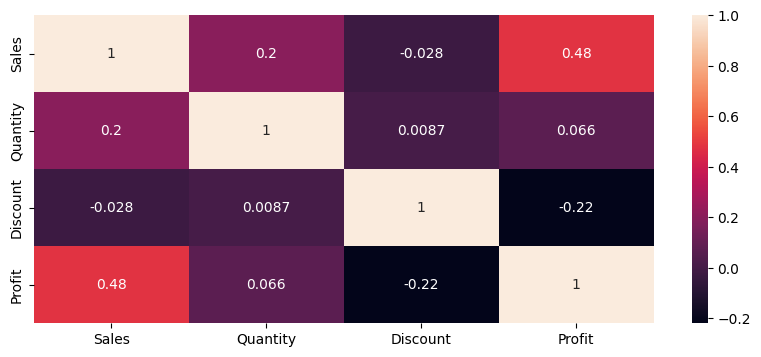

In [13]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot=True)
plt.show()

<i>Most Correlation: <b><font color='green'>Sales</font></b> & <b><font color='green'>Profit</font></b><br>
Least Correlatin: <b><font color='red'>Discount</font></b> & <b><font color='red'>Quantity</font></b></i>

<i>Relation between <b><font color=#fc6f03>Discont</b></font> & Sales and Profit</i>

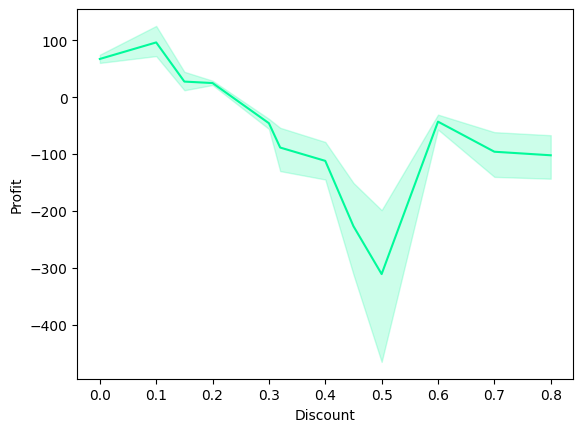

In [14]:
sns.lineplot(x="Discount",y="Profit",data=df, color='mediumspringgreen')
plt.show()

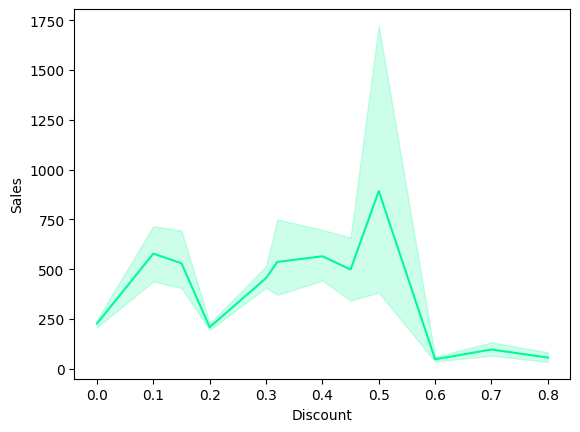

In [15]:
sns.lineplot(x="Discount",y="Sales",data=df, color='mediumspringgreen')
plt.show()

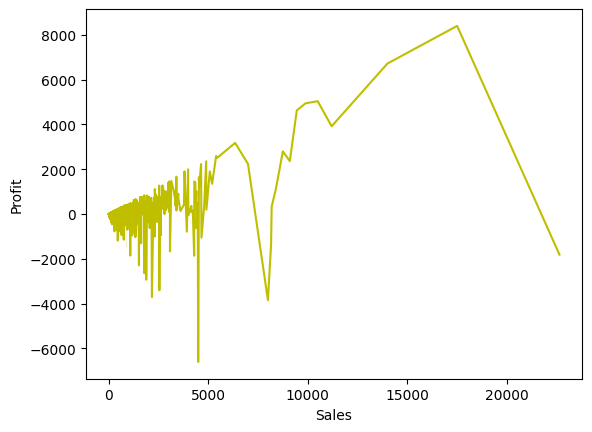

In [16]:
sns.lineplot(x="Sales",y="Profit",data=df, color='y')
plt.show()

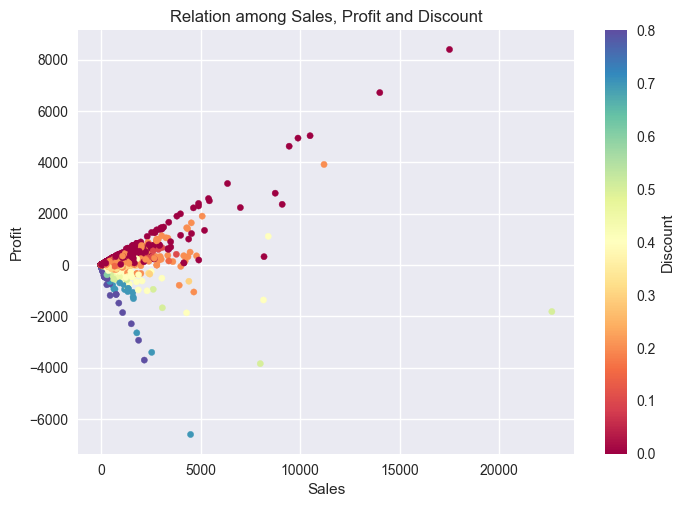

In [17]:
plt.style.use("seaborn")
df.plot(kind="scatter",x="Sales",y="Profit",c="Discount",colormap="Spectral")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Relation among Sales, Profit and Discount")
plt.show()

<i>As Discount <b><font color='green'>increases</b></font>, Profit and Sales <b><font color='red'>decreases</font></b><br>
As Sales <b><font color='green'>increases</font></b>, Profit <b><font color='green'>increases</font></b></i>

<i>Relation between <b><font color=#fc6f03>shipping mode</b></font> & Sales,Quantity,Discount and Profit</i>

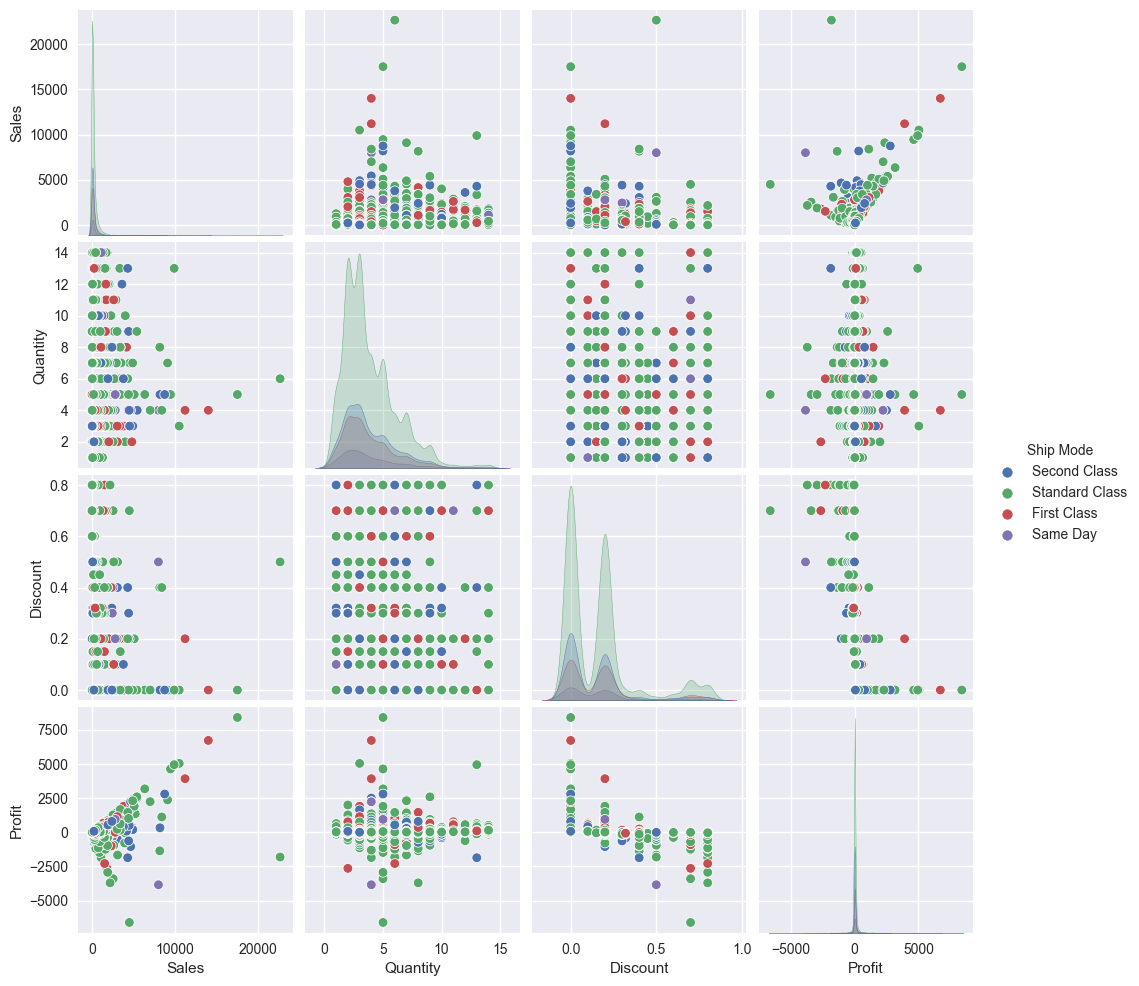

In [18]:
sns.pairplot(df, hue='Ship Mode')

In [19]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

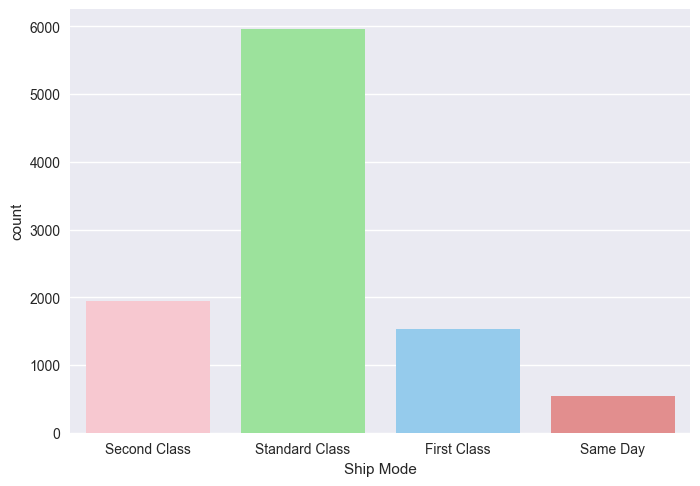

In [20]:
sns.countplot(x=df['Ship Mode'], palette=[ 'pink','lightgreen', 'lightskyblue', 'lightcoral'])

<i>Most used shipping Mode: <b><font color='green'>Standard Class</font></b><br>
Least used shipping Mode: <b><font color='red'>Same Day</font></b></i>

In [21]:
ps=df.groupby('Ship Mode')[["Profit","Sales"]].sum()
ps

,Profit,Sales
Ship Mode,,
First Class,48953.6561,3.513805e+05
Same Day,15871.8869,1.283217e+05
Second Class,57446.6516,4.591770e+05
Standard Class,163969.2280,1.357316e+06


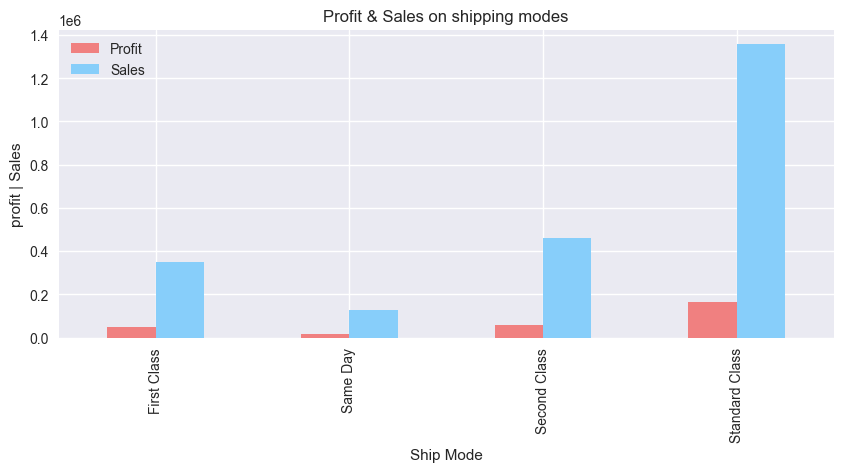

In [22]:
ps.plot(kind='bar',figsize=(10,4), color=['lightcoral', 'lightskyblue'])
plt.title("Profit & Sales on shipping modes")
plt.ylabel("profit | Sales")
plt.show()

<i>Maximum Profit & Sales:  <b><font color='green'>Standard Class</font></b><br>
Minimum Profit & Sales:  <b><font color='red'>Same Day</font></b>

<i>Relation between <b><font color=#fc6f03>Categrory</b></font> & Sales and Profit</i>

In [23]:
cat=df["Category"].value_counts()
cat

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

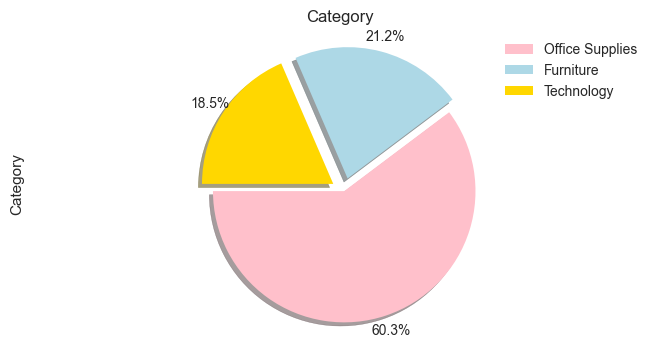

In [24]:
explode_list=[0,0.1,0.1]
cat.plot(kind="pie", figsize=(8,4), autopct="%1.1f%%", shadow=True, startangle=180, explode=explode_list, labels=None, pctdistance=1.12, colors=['pink', 'lightblue','gold'])
plt.title("Category")
plt.axis("equal")
plt.legend(labels=cat.index,loc="upper right")
plt.show()

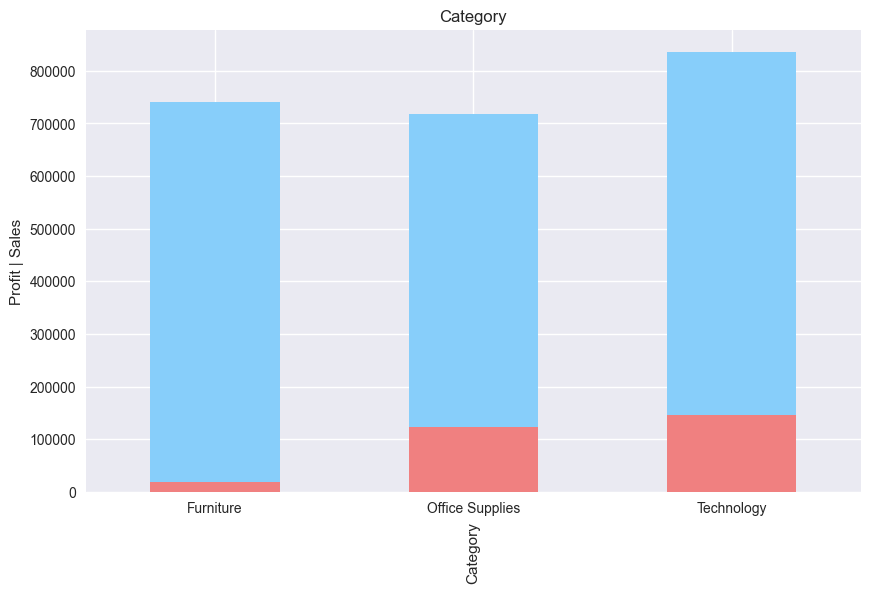

In [25]:
cp=df.groupby('Category').Profit.sum()
cs=df.groupby('Category').Sales.sum()

ax0=cs.plot(kind="bar", figsize=(10,6), color='lightskyblue')
ax0=cp.plot(kind="bar", figsize=(10,6), color='lightcoral')

ax0.set_title('Category')
ax0.set_xlabel('Category',rotation=90)
ax0.set_ylabel('Profit | Sales')
plt.xticks(rotation=0)

plt.show()

<i>Maximum Profit & Sales:  <b><font color='green'>Technology</font></b><br>
Minimum Profit & Sales:  <b><font color='red'> Office Supplies</font></b>

<i>Relation between <b><font color=#fc6f03>Sub-Categrory</b></font> & Sales and Profit</i>

In [26]:
sub=df['Sub-Category'].value_counts()
sub

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

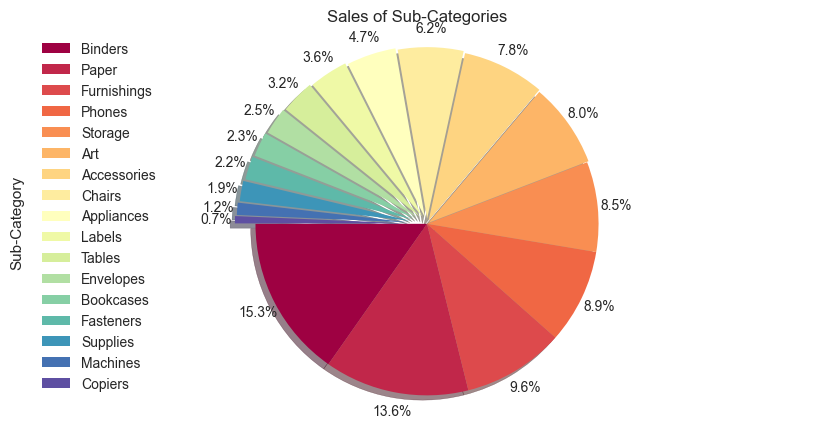

In [27]:
cmap = cm.get_cmap('Spectral')
explode_list=[0,0,0,0,0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12]
sub.plot(kind='pie', figsize=(10,5),autopct="%1.1f%%",shadow=True,startangle=180,explode=explode_list, labels=None, pctdistance=1.11,cmap=cmap)
plt.title('Sales of Sub-Categories')
plt.axis('equal')
plt.legend(labels=sub.index,loc='upper left')
plt.show()

<i>Maximum Sales:  <b><font color='green'> Binders</font></b>, <b><font color='green'>Paper</font></b> and <b><font color='green'>Furnishings</font></b><br>
Minimum Sales:  <b><font color='red'> Suppliers</font></b>, <b><font color='red'>Machines</font></b> and <b><font color='red'>Copies</font></b>

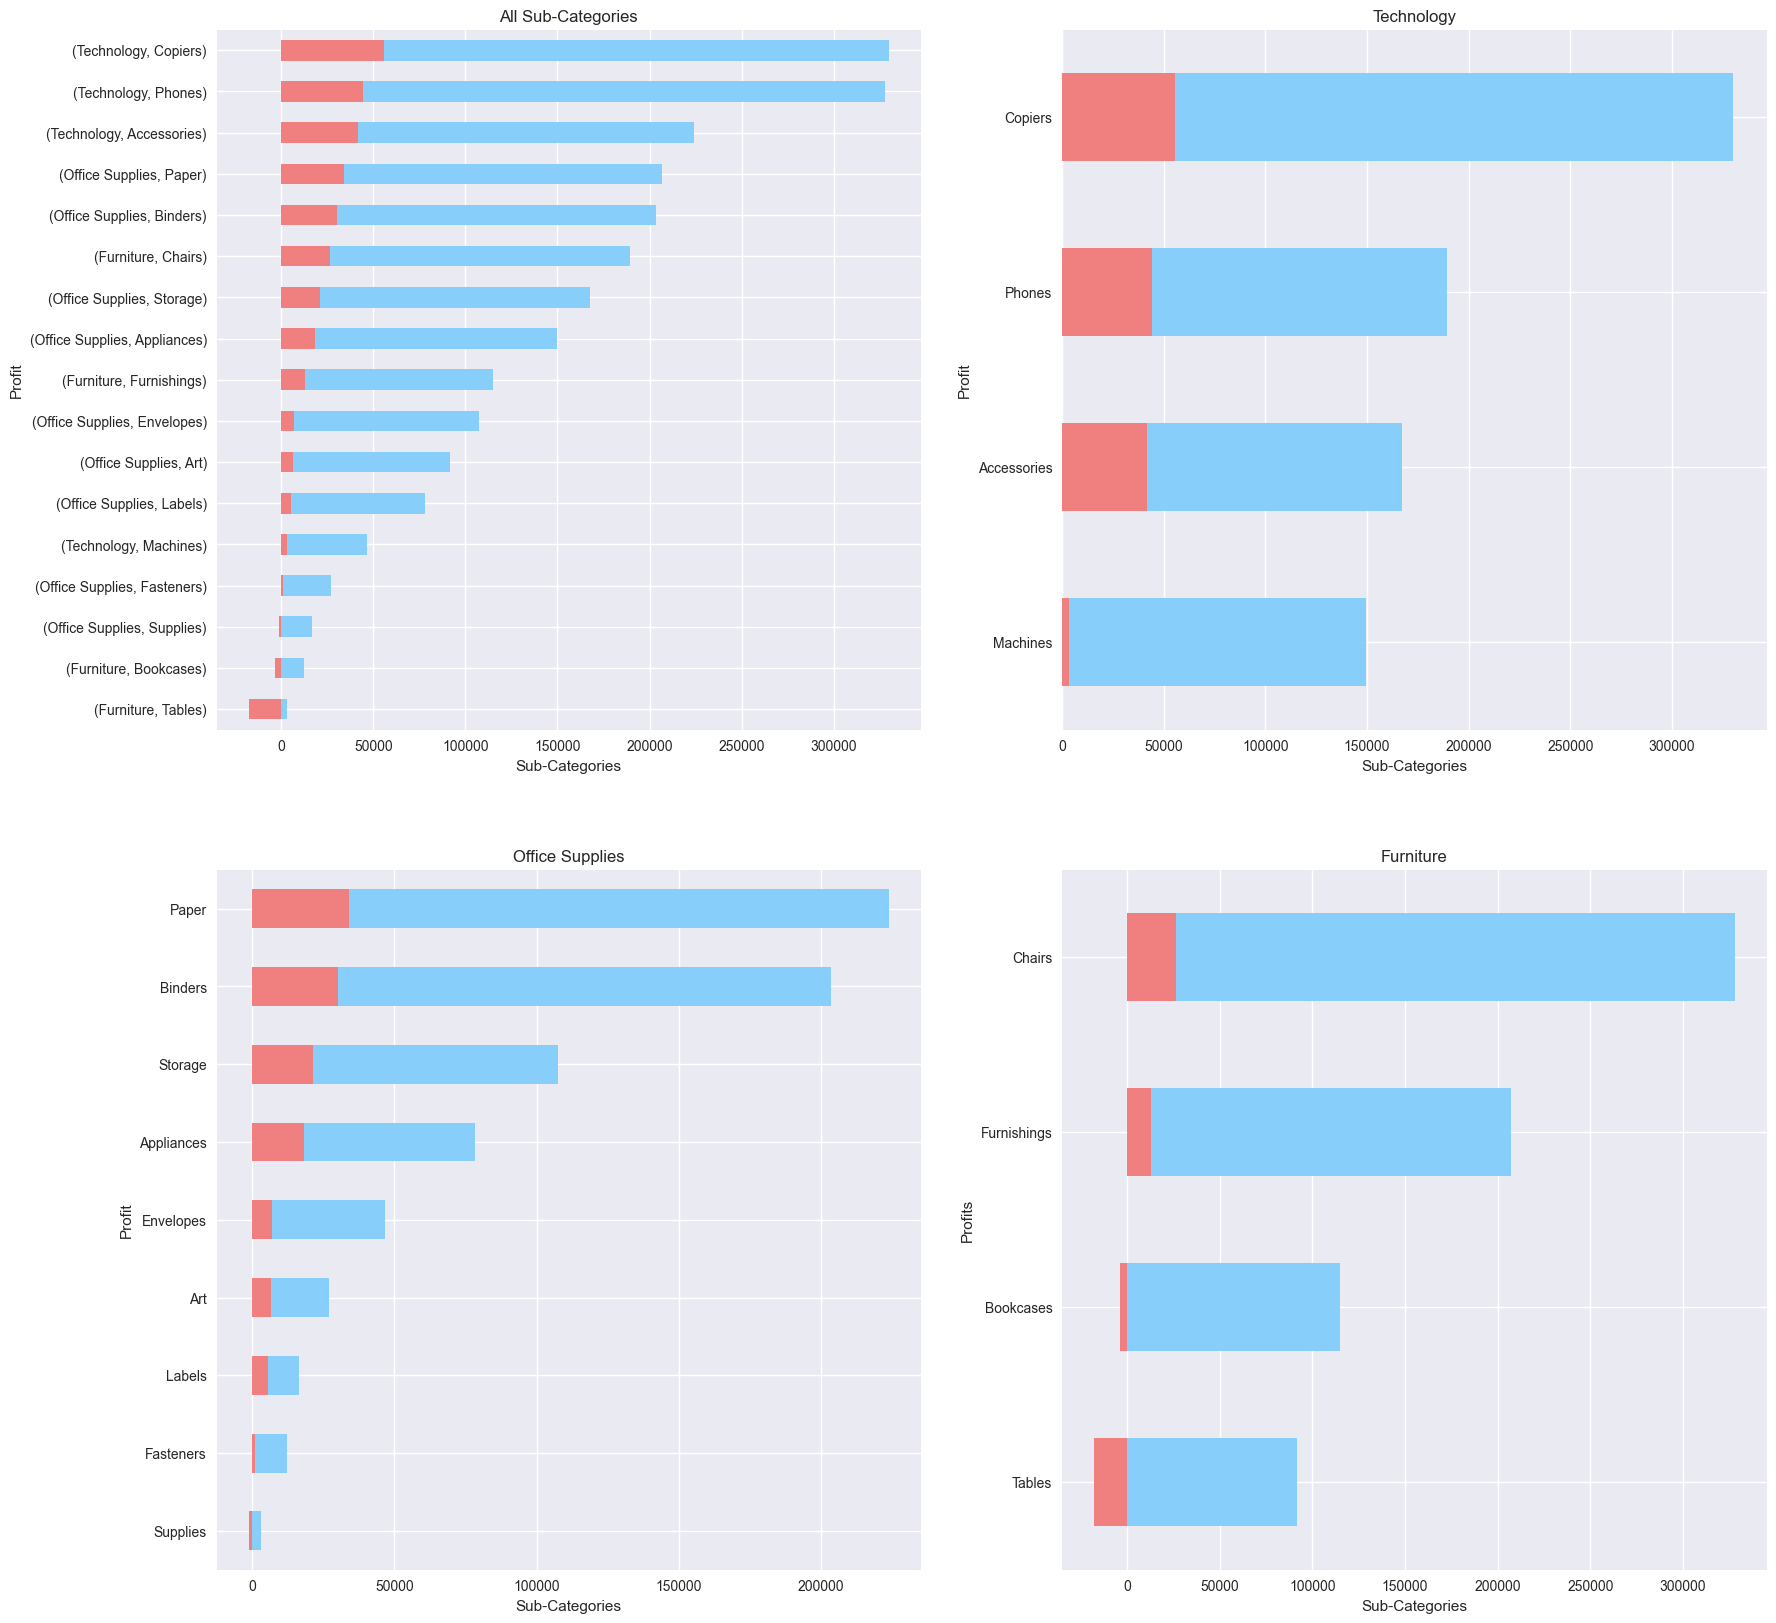

In [28]:
x=df.groupby(["Category","Sub-Category"]).Sales.sum()
y=df.groupby(["Category","Sub-Category"]).Profit.sum()

#Sales

fig=plt.figure()

ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

#Furniture
x['Furniture'].sort_values(ascending=True).plot(kind='barh', figsize=(20,20),ax=ax4,color='lightskyblue')
ax4.set_title('Furniture')
ax4.set_xlabel('Sub-Categories')
ax4.set_ylabel('Sales')

#Technology
x['Technology'].sort_values(ascending=True).plot(kind='barh', figsize=(20,20),ax=ax2,color='lightskyblue')
ax2.set_title('Technology')
ax2.set_xlabel('Sub-Categories')
ax2.set_ylabel('Sales')

#Office Supplies
x['Office Supplies'].sort_values(ascending=True).plot(kind='barh', figsize=(20,20),ax=ax3,color='lightskyblue')
ax3.set_title('Office Supplies')
ax3.set_xlabel('Sub-Categories')
ax3.set_ylabel('Sales')

#Total
x.sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax1,color='lightskyblue')
ax1.set_title("All Sub-Categories")
ax1.set_xlabel("Sub-Categories")
ax1.set_ylabel("Sales")



#Profit

#Furniture
y['Furniture'].sort_values(ascending=True).plot(kind='barh', figsize=(20,20),ax=ax4,color='lightcoral')
ax4.set_title('Furniture')
ax4.set_xlabel('Sub-Categories')
ax4.set_ylabel('Profits')

#Technology
y['Technology'].sort_values(ascending=True).plot(kind='barh', figsize=(20,20),ax=ax2,color='lightcoral')
ax2.set_title('Technology')
ax2.set_xlabel('Sub-Categories')
ax2.set_ylabel('Profit')

#Office Supplies
y['Office Supplies'].sort_values(ascending=True).plot(kind='barh', figsize=(20,20),ax=ax3,color='lightcoral')
ax3.set_title('Office Supplies')
ax3.set_xlabel('Sub-Categories')
ax3.set_ylabel('Profit')

#Total
y.sort_values(ascending=True).plot(kind='barh', figsize=(20,20),ax=ax1,color='lightcoral')
ax1.set_title('All Sub-Categories')
ax1.set_xlabel('Sub-Categories')
ax1.set_ylabel('Profit')

plt.show()

<i>Relation between <b><font color=#fc6f03>States</b></font> & Sales and Profit</i>

In [29]:
state=df["State"].value_counts()
state

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

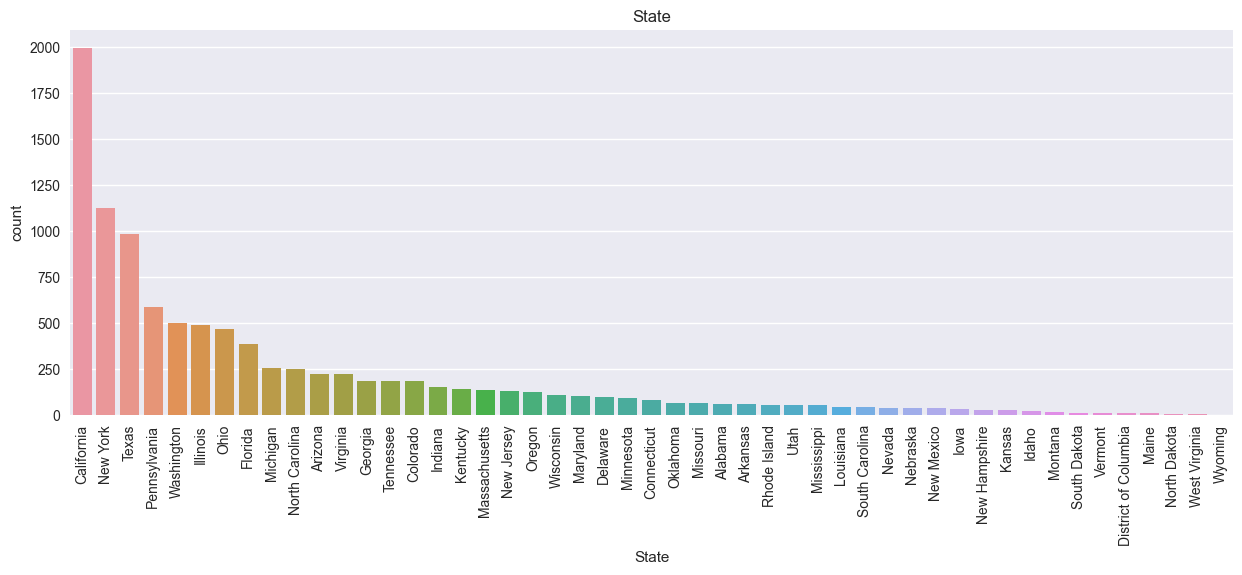

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['State'], order = df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.title('State')
plt.show()

<i>Most buyers belong to :  <b><font color='green'> California</font></b>, <b><font color='green'>New York</font></b> and <b><font color='green'>Texas</font></b><br>
Least buyers belong to :  <b><font color='red'> North Dakota</font></b>, <b><font color='red'>West Virginia</font></b> and <b><font color='red'>Wyoming</font></b>

Text(0, 0.5, 'Profit | Sales')

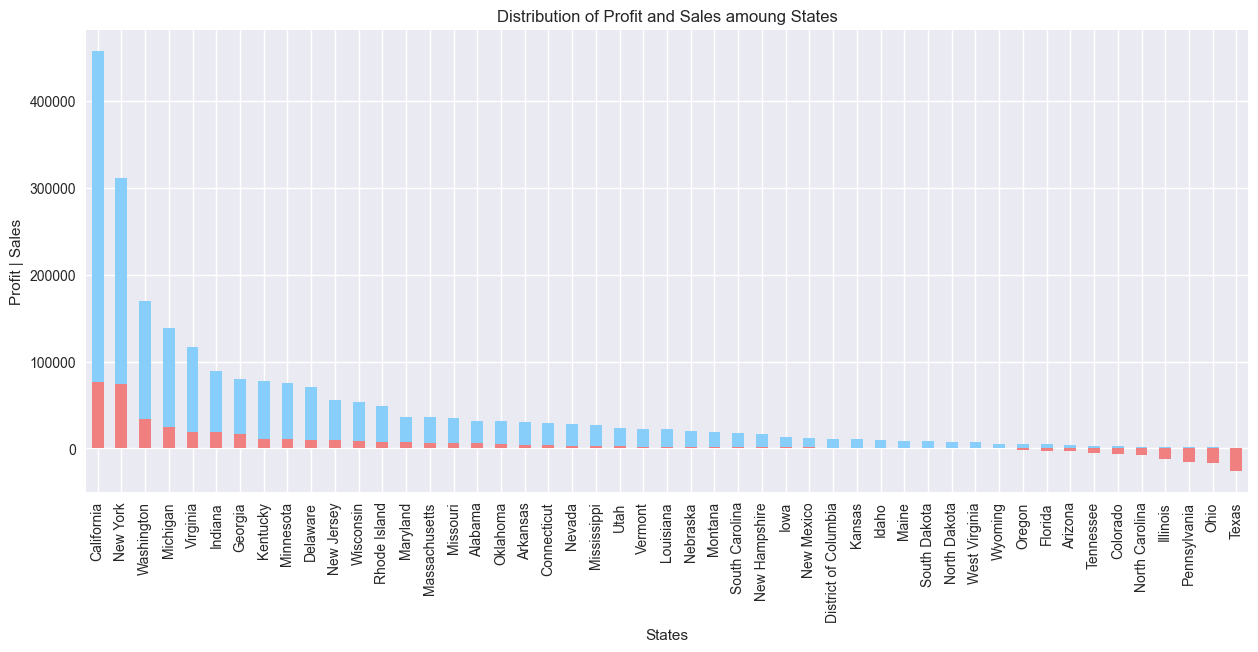

In [31]:
ss=df.groupby(["State"]).Sales.sum()
sp=df.groupby(["State"]).Profit.sum()

ss.sort_values(ascending=False).plot(kind='bar',figsize=(15,6),color='lightskyblue')
sp.sort_values(ascending=False).sort_values(ascending=False).plot(kind='bar',figsize=(15,6),color='lightcoral')

plt.title('Distribution of Profit and Sales amoung States')
plt.xlabel('States')
plt.ylabel('Profit | Sales')

<i>Maximum Profit & Sales in :  <b><font color='green'> California</font></b>, <b><font color='green'>New York</font></b> and <b><font color='green'>Washington</font></b><br>
Minimum Profit & Sales in : <b><font color='red'> Tennessee</font></b>,<b><font color='red'> Colorado</font></b>,<b><font color='red'> North Carolina</font></b>, <b><font color='red'> Ilionis</font></b>,  <b><font color='red'> Pennsylvania</font></b>, <b><font color='red'>Ohio</font></b> and <b><font color='red'>Texas</font></b>

<i>Relation between <b><font color=#fc6f03>Segments</b></font> & Sales and Profit</i>

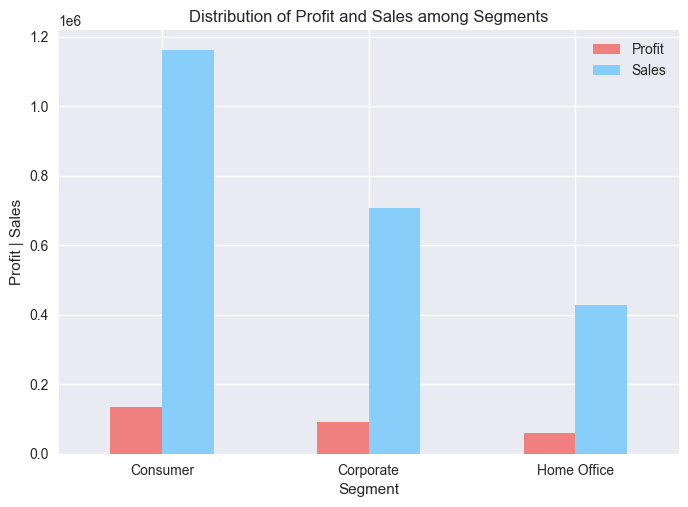

In [32]:
df.groupby('Segment')[['Profit','Sales']].sum().plot(kind='bar',color=['lightcoral','lightskyblue'])

plt.ylabel('Profit | Sales')
plt.xlabel('Segment')
plt.xticks(rotation=0)
plt.title('Distribution of Profit and Sales among Segments')

plt.show()

<b><font color='red'>Conculsion:</font></b><br>
<ul>
    <li>Must cut on discounts to increase Profit and Sales.</li>
<li>Focusing on Standard Class more as it brings most profit and sales.</li>
<li>Moving the major distribution of business towards Technology(Copiers, Phones and Accessories) which bring maximum profit.</li>
<li>Uplifting sales in cities that are facing losses such as Tennessee, Colorado, North Carolina, Ilionis, Pennsylvania, Ohio and Texas.</li>
<li>Keeping focus over the cities with most buyers, sales and profit such as California and New york.</li>
<li>Consumer segment should be encouraged as it brings most sales and profit.</li>
</ul>